# STOCK MARKET PREDICTION & CLUSTERING

### ABSTRACT

The stock market is one of the most dynamic and volatile sources of data.

The data is generated every second as the money never sleeps. The change in the values of stocks is a result of various measures and sentiments of the people.

In this project, I've tried to cluster the stocks of National Stock Exchange (NSE) India in Top gains and Losers over a period.

This is the first version of the project, I will be refining the project over time.

### Workflow

The project runs in the following way:

Importing the necessary Libaries

In [34]:
# preprocessing
import math
import random
import pandas as pd
import numpy as np
from datetime import date 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
import preprocessing
# visualization
import matplotlib.pyplot as plt 
from pylab import *
# neural network
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import LSTM 

### National Stock Exchange (NSE) Data

The National Stock Exchange of India Limited is the leading stock exchange of India, located in Mumbai. 

NSE official website 
https://www.nseindia.com/

NSE SYMBOLS list:
https://www.nseindia.com/products/content/derivatives/equities/fo_underlying_home.htm

Using two libraries for data calling purpose
1. NSEpy <br>
    https://nsepy.readthedocs.io/en/latest/<br>
    nsepy is used to retrive the data of specific stock<br><br>
2. NSETOOLS
    https://nsetools.readthedocs.io/en/latest/<br>
    nsetools is used to get the list of stock in NSE

In [35]:
import nsepy as nse 
from nsetools import Nse
nsel = Nse()
stock_list = nsel.get_stock_codes()
stock_list= {v: k for k, v in stock_list.items()}

In [36]:
iterator = iter(stock_list.items())
for i in range(100):
    print(next(iterator))

('NAME OF COMPANY', 'SYMBOL')
('20 Microns Limited', '20MICRONS')
('21st Century Management Services Limited', '21STCENMGM')
('3i Infotech Limited', '3IINFOTECH')
('3M India Limited', '3MINDIA')
('3P Land Holdings Limited', '3PLAND')
('5Paisa Capital Limited', '5PAISA')
('63 moons technologies limited', '63MOONS')
('A2Z Infra Engineering Limited', 'A2ZINFRA')
('Aarti Drugs Limited', 'AARTIDRUGS')
('Aarti Industries Limited', 'AARTIIND')
('Aarvee Denims & Exports Limited', 'AARVEEDEN')
('Aavas Financiers Limited', 'AAVAS')
('Aban Offshore Limited', 'ABAN')
('ABB India Limited', 'ABB')
('Abbott India Limited', 'ABBOTINDIA')
('Aditya Birla Capital Limited', 'ABCAPITAL')
('Aditya Birla Fashion and Retail Limited', 'ABFRL')
('ABM International Limited', 'ABMINTLTD')
('ACC Limited', 'ACC')
('Accelya Solutions India Limited', 'ACCELYA')
('Action Construction Equipment Limited', 'ACE')
('Adani Enterprises Limited', 'ADANIENT')
('Adani Gas Limited', 'ADANIGAS')
('Adani Green Energy Limited', 'A

In [37]:
#for each_stock in stock_list:
#    print(each_stock)

In [38]:
number_of_company = int(input('Entert the number of company:\t'))
company_list =[]
for _ in range(number_of_company):
    name = input('Enter the Company to Predict\t:\t')
    company_list.append(name)

Entert the number of company:	1
Enter the Company to Predict	:	Apollo Hospitals Enterprise Limited


In [39]:
numbered = list(company_list)

Collecting over 19 years of data, for the model.

The data is days.

If a company is not listed in NSE in the year 2000, the data is collected from the day it got listed.

In [40]:
stock_data = list(company_list)
for i in range(number_of_company):
    stock_data[i] = nse.get_history(symbol=company_list[i], start=date(2000,1,1), end=date(2019,12,31))


## Preprocessing

Since only Open High Low Close, attributes are only used in prediction, we remove the other attributes in the dataframes

In [41]:
for each_stock in stock_data:
    each_stock.drop(['Trades','Volume','%Deliverble','VWAP','Turnover','Last','Prev Close','Series','Symbol'], axis =1,inplace =True)

Adding feature, Change which gives the Volatility of stock, more the volatility better for day trading.

In [42]:
for each_stock in stock_data:
    each_stock['Change'] = each_stock['Close']-each_stock['Open']

Adding feature, Gains. It is a categorical feature, representing the grwoth or loss in each day.<br>
Gain = 1<br>
Neutral =0<br>
Loss =-1<br>

In [43]:
for each_stock in stock_data:
    each_stock.loc[each_stock.Change >0, 'Gains'] = 1 
    each_stock.loc[each_stock.Change <0, 'Gains'] = -1 
    each_stock.loc[each_stock.Change ==0, 'Gains'] = 0 

Printing the first 5 values and description of data for each stock's dataframe.

In [44]:
print(numbered[0])
stock_data[0].head()

Apollo Hospitals Enterprise Limited


,Open,High,Low,Close,Deliverable Volume,Change,Gains
Date,,,,,,,
2000-01-03,208.0,210.10,208.0,210.10,NaN,2.10,1.0
2000-01-04,226.9,226.95,226.9,226.95,NaN,0.05,1.0
2000-01-05,245.0,245.15,227.0,243.55,NaN,-1.45,-1.0
2000-01-06,245.0,263.05,245.0,263.05,NaN,18.05,1.0
2000-01-07,284.1,284.10,284.1,284.10,NaN,0.00,0.0


In [45]:
print(numbered[0])
stock_data[0].describe()

Apollo Hospitals Enterprise Limited


,Open,High,Low,Close,Deliverable Volume,Change,Gains
count,4977.00000,4977.000000,4977.000000,4977.000000,4.468000e+03,4977.000000,4977.000000
mean,653.69358,664.741380,642.462518,652.561453,9.674241e+04,-1.132128,-0.166566
std,423.21735,428.566879,417.659489,422.932606,2.510776e+05,16.524165,0.984498
min,56.00000,57.000000,54.000000,55.200000,6.400000e+01,-178.100000,-1.000000
25%,315.00000,325.200000,306.850000,316.900000,1.982250e+04,-7.700000,-1.000000
50%,515.00000,525.000000,505.300000,513.900000,4.850150e+04,-1.300000,-1.000000
75%,1042.70000,1063.300000,1025.000000,1043.300000,1.096478e+05,4.750000,1.000000
max,1572.00000,1579.700000,1520.000000,1536.800000,8.452864e+06,121.750000,1.000000


## Visualization 

Visualization of the Open values and Change over the years of all the listed stocks.

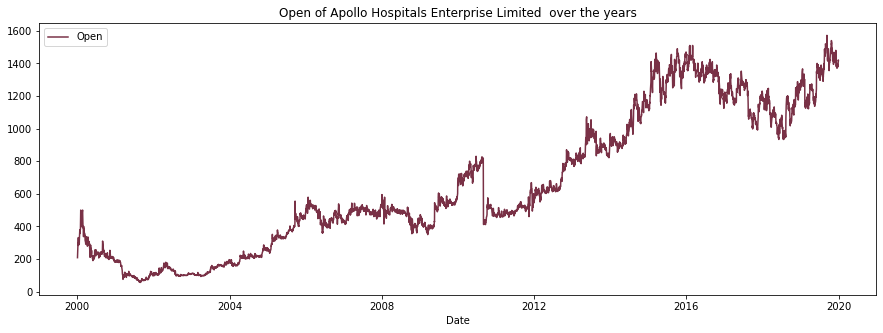

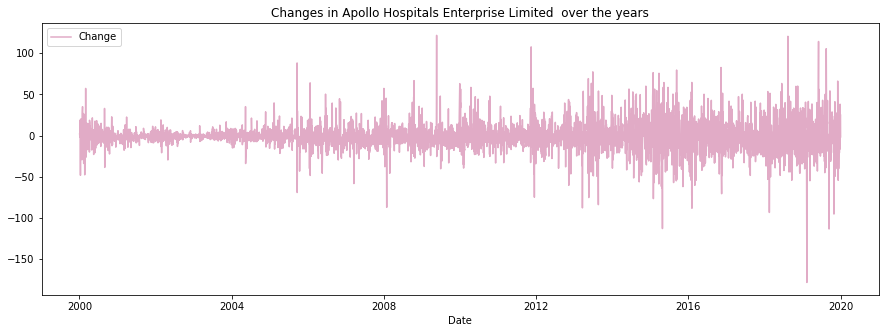

In [46]:
for each_stock,number in zip(stock_data,numbered):
    each_stock.plot(y ='Open',color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)),figsize=(15,5),title='Open of ' +number+ '  over the years')
    each_stock.plot(y='Change',color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)),figsize=(15,5),title ='Changes in '+ number+'  over the years')

Following are the major mesures for prediction.<br>
1. OHLC <br>
    An open-high-low-close chart is a type of chart typically used to illustrate movements in the price of a financial instrument over time.<br>
2. HLC - High Low Close graph<br>
3. Close - Closing price of each day

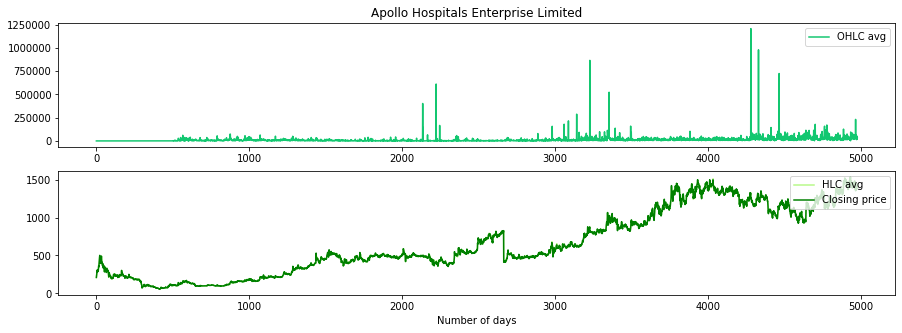

In [47]:
for each_stock,number in zip(stock_data,numbered):
    np.random.seed(7)
    obs = np.arange(1, len(each_stock) + 1, 1)
    OHLC_avg = each_stock.mean(axis = 1)
    HLC_avg = each_stock[['High', 'Low', 'Close']].mean(axis = 1)
    close_val= each_stock[['Close']]
    plt.figure(figsize=(15,5))
    subplot(2,1,1)
    plt.plot(obs, OHLC_avg,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)), label = 'OHLC avg')
    plt.legend(loc = 'upper right')
    plt.title(number)
    subplot(2,1,2)
    plt.plot(obs, HLC_avg, color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)), label = 'HLC avg')
    plt.plot(obs, close_val, 'g', label = 'Closing price')
    plt.legend(loc = 'upper right')
    plt.xlabel('Number of days')
    print('\n\n\n')
    plt.show()

### Modeling 

In [ ]:
for each_stock,number in zip(stock_data,numbered):
# Selecting the necessary attributes for prediction 
    OHLC_avg = each_stock[['Open','High', 'Low', 'Close']].mean(axis = 1)
    HLC_avg = each_stock[['High', 'Low', 'Close']].mean(axis = 1)
    close_val= each_stock[['Close']]
    OHLC_avg=close_val
    
# Converting to time series    
    OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    OHLC_avg = scaler.fit_transform(OHLC_avg)
    
# Splitting
    train_OHLC = int(len(OHLC_avg) * 0.75)
    test_OHLC = len(OHLC_avg) - train_OHLC
    train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

# TIME-SERIES DATASET FOR TIME T, VALUES FOR TIME T+1
    trainX, trainY = preprocessing.new_dataset(train_OHLC, 1)
    testX, testY = preprocessing.new_dataset(test_OHLC, 1)

# Reshaping
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    step_size = 1

# LSTM MODEL
    model = Sequential()
    model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
    model.add(LSTM(16))
    model.add(Dense(1))
    model.add(Activation('linear'))
    print(number.capitalize())
# Training
    model.compile(loss='mean_squared_error', optimizer='adagrad') 
    model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

# Predicting 
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    print('\n\n\n')
    
    
# Output, Error and Plotting 
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])


# Trainng RMSE
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train RMSE of '+number+' %.2f' % (trainScore))

# Test RMSE
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test RMSE of '+number+' %.2f' % (testScore))

# Plotting
    trainPredictPlot = np.empty_like(OHLC_avg)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

    testPredictPlot = np.empty_like(OHLC_avg)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

    OHLC_avg = scaler.inverse_transform(OHLC_avg)

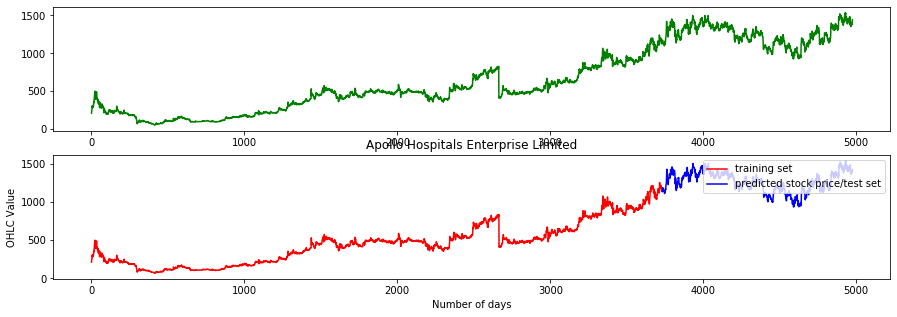

[  7.47773437  23.7607666  -17.55698242 ...  -2.45090332  32.04421387
  -4.15395508]


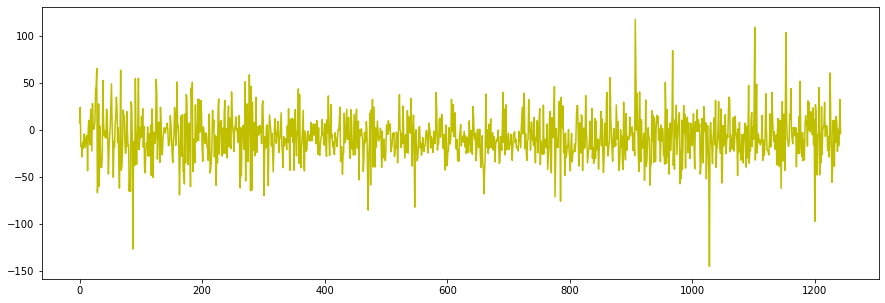

In [76]:
    plt.figure(figsize=(15,5))
    subplot(2,1,1)
    plt.plot(OHLC_avg, 'g', label = 'original dataset')
    subplot(2,1,2)
    plt.title(number)
    plt.plot(trainPredictPlot, 'r', label = 'training set')
    plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
    plt.legend(loc = 'upper right')
    plt.xlabel('Number of days')
    plt.ylabel('OHLC Value')
    plt.show()
    plt.figure(figsize=(15,5))
    testError = (testY[0] - testPredict[:,0])
    print(testError)
    plt.plot(testError,'y')
    plt.show()

    
    

In [59]:
    # PREDICT FUTURE VALUES
    #last_val = testPredict[-1]
    #print(type(last_val))
    last_val = np.array([1403.95])
    print(last_val)
    last_val_scaled = last_val/last_val
    
    

    next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
    last_val = np.asscalar(last_val)
    next_val = np.asscalar(last_val*next_val)
    print ("Last Day Value of "+number, last_val)
    print ("Next Day Value of"+number, next_val)
    print('\n')
    if last_val > next_val:
        print('Negative cluster')
    else:
        print('Positive cluster')
    print('\n\n\n')

[1403.95]
Last Day Value of Apollo Hospitals Enterprise Limited 1403.95
Next Day Value ofApollo Hospitals Enterprise Limited 1398.0474853515625


Negative cluster






C:\Users\aksha\anaconda3\envs\kite\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\aksha\anaconda3\envs\kite\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if sys.path[0] == '':
